<center><h1> Universidade Federal do ABC </h1></center>

<center><h1> Relatório - Laboratório n.3 </h1></center>

<center><h3> Nome: Rafael Costa Fernandes </h3></center>
<center><h3>  RA: 21201920754 </h3></center>

# Resumo

Neste relatório será discutida a implementação de algoritmos de detecção de bordas do OpenCV. O Método de Canny e o Método do Laplaciano são os algoritmos mais utilizados para estas tarefas. Também será discutido o algoritmo Watershed (O método de "Divisão de águas"). Os resultados obtidos foram satisfatórios, principalmente o método Laplaciano e Watershed, onde as bordas foram detectadas com boa precisão. 


# Introdução

As bordas físicas de um objeto são umas de suas propriedades mais importantes, já que são elas que correspondem aos limites do objeto e mudanças em suas superfícies, tanto de orientação quanto de materiais **[1]**. Segundo Torre, bordas tridimensionals são normalmente mapeadas pelo processo de imagem em pontos críticos do perfil de intensidade bi-dimensional formado nas câmeras. O objetivo final de um processo de detecção de bordas é a caracterização de mudanças de intensidade na imagem em termos de processos físicos que se originaram dela. 

Segundo Canny, detectores de bordas têm sido parte essencial de vários sistemas de visão computacional. O processo de detecção serve como um simplificador da análise de imagens, reduzindo drasticamente a quantidade de dados processados, ainda assim preservando as informações estruturais sobre os limites do objeto. Ultimamente existem inúmeros algoritmos de detecção de bordas, entre os contemporâneos temos algoritmos híbridos **[3]**, métodos adaptativos **[4]** e algoritmos baseados em aprendizado de máquina **[5]**. 


# Metodologia

Todos os algoritmos apresentados neste relatório foram escritos em Python e rodados em um PC pessoal com as seguintes configurações: processador intel i5-4460 e 16 Gb de memória ram. Alguns algoritmos utilizados neste trabalho têm referências nos comentários. 

# Resultados

Os resultados obtidos dos exercícios propostos podem ser observados abaixo. Todos os códigos estão devidamente comentados para uma melhor compreensão. Os exercícios propostos foram:

1. Elabore um programa que carrega a sua foto - aquela mesma obtida nas aulas anteriores - e realiza a detecção de bordas pelo método Lapalaciano e pelo método de Canny. O programa deve mostrar a foto original, as bordas e uma terceira imagem que sobrepõe a original e as bordas. Use imagens coloridas e em escala de cinzas. Compare os resultados.

2. Elabore um programa, utilizando o algoritmo watershed para realizar testes de segmentação em diversas imagens.
    + Imagens obtidas do vídeo da primeira prática; 
    + rice.png
    + cameraman.tif
    + peppers.png
    

# Exercício 1

Geralmente, para a detecção de um objeto em uma cena, a primeira etapa é a detecção de bordas deste objeto, geralmente essas bordas devem ser não segmentadas e ter uma forma parecida do objeto original. Por exemplo, se é necessário detectar círculos em uma cena, todas as bordas não segmentadas com formatos ovais tem grande probabilidade de serem círculos na cena original. 

Primeiramente são demonstradas as imagens obtidas pelo algoritmo de Canny. Podemos observar que a borda obtida em volta do objeto está segmentada, mas a forma geral do objeto foi detectada, com uma boa precisão. Também devemos considerar que a cena apresentada tem um alto contraste, facilitando a detecção das bordas pelo algoritmo, que mesmo assim ainda não foi capaz de segmentar completamente o objeto do ambiente. O algoritmo levou 0.62 e 0.59 segundos para uma imagem colorida e em escala de cinzas, respectivamente.

O algoritmo de detecção de bordas pelo método Laplaciano foi mais bem sucedido. Segmentando o objeto do ambiente completamente, tanto na imagem colorida e na escala de cinzas. Este algoritmo é mais custoso computacionalmente, levando 0.95 e 0.64 segundos para uma imagem colorida e em escala de cinzas, respectivamente.

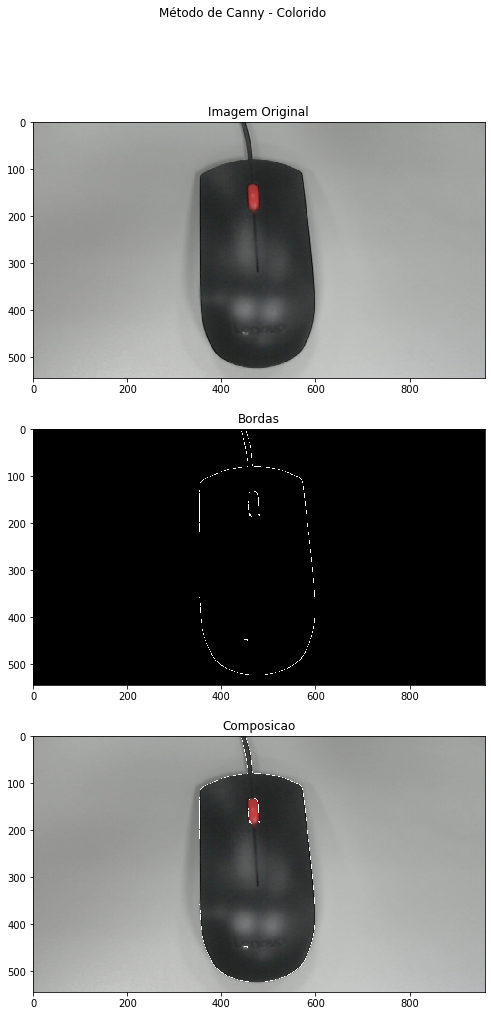

O algoritmo de Canny levou 0.62s para uma imagem colorida


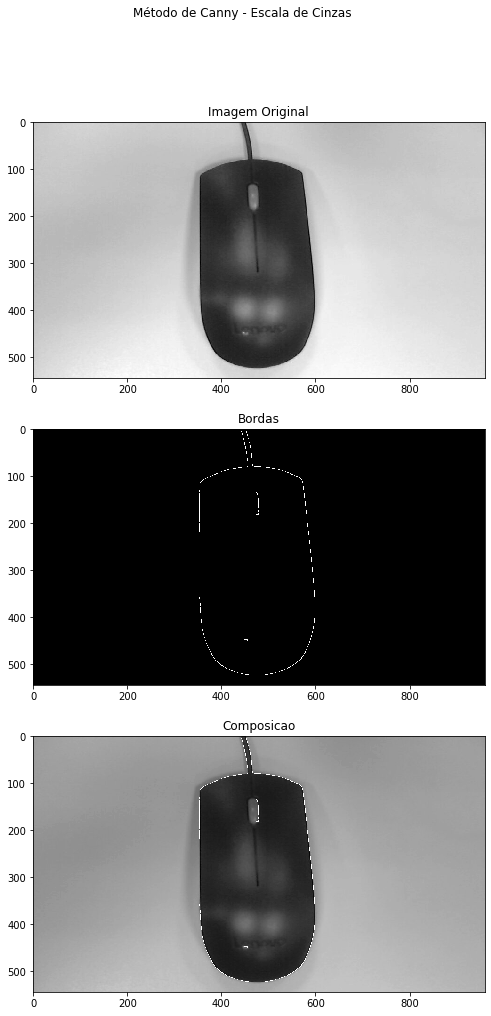

O algoritmo de Canny levou 0.59s para uma imagem em escala de cinzas


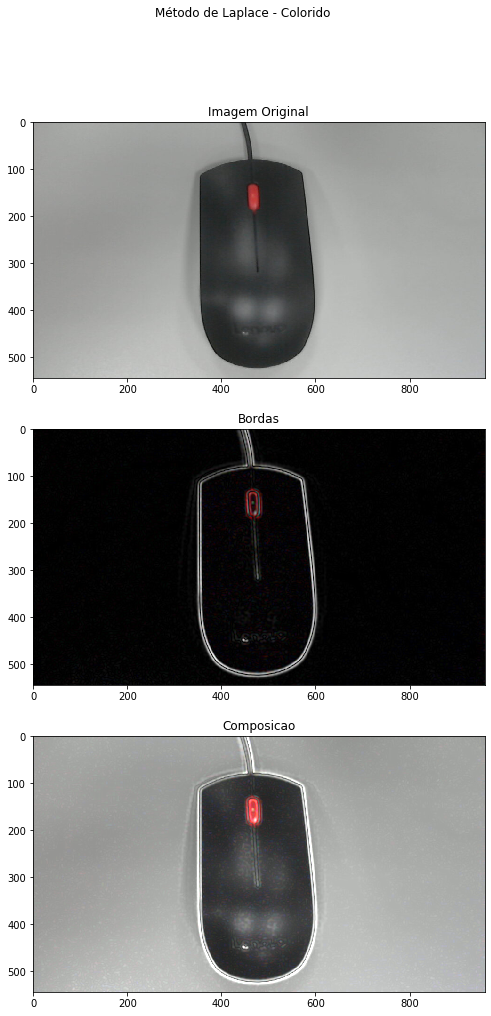

O algoritmo Laplaciano levou 0.95s para uma imagem colorida


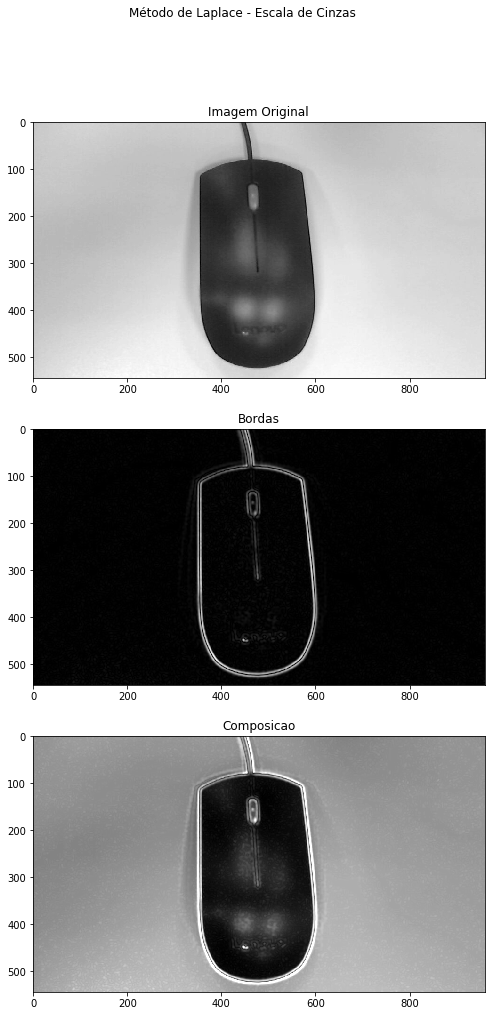

O algoritmo Laplaciano levou 0.64s para uma imagem em escala de cinzas


In [11]:
import numpy as np
import cv2 as cv
import time
from matplotlib import pyplot as plt

plt.close('all')


def canny(caminho_arquivo, cor=True):
    t_i = time.time()
    # Leitura da Imagem
    img = cv.imread(caminho_arquivo, cor)
    # Reconhecimento das bordas pelo algoritmo de canny
    bordas = cv.Canny(img,100,200)
    # Configuração do plot da imagem original
    fig = plt.figure(figsize=(18, 16))
    titulo = 'Método de Canny - ' + ('Colorido' if cor else 'Escala de Cinzas')
    fig.suptitle(titulo)
    cmap = None if cor else 'gray'
    if cor:
        # Conversão para de BGR para RGB (convenção do matplotlib)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.subplot(311).imshow(img, cmap=cmap)
    
    # Plot das bordas em escala de cinzas
    plt.title('Imagem Original')
    plt.subplot(312).imshow(bordas, cmap='gray')
    plt.title('Bordas')
    
    # Composição das imagens e plot
    if cor:
        # Borda em escala de cinza precisa ser convertida para 3 canais RGB para soma
        bordas_d = bordas
        height, width, channels = img.shape    
        bordas = np.ones((height, width, channels), np.uint8)
        for i in range(channels):
            bordas[:, :, i] = np.multiply(bordas[:, :, i], bordas_d)
    
    # plot da composição da imagem original e bordas detectadas
    img_sum = cv.add(img, bordas)
    plt.subplot(313).imshow(img_sum, cmap=cmap)        
    plt.title('Composicao')
    plt.show()
    t_f = time.time() - t_i
    string =f'O algoritmo de Canny levou {t_f:.2f}s para uma ' + ('imagem colorida' if cor else 'imagem em escala de cinzas')
    print(string)


def laplace(caminho_arquivo, cor=True):
    t_i = time.time()
    # Leitura da Imagem
    img = cv.imread(caminho_arquivo, cor)
    cmap = None if cor else 'gray'    
    
    # Reconhecimento das bordas pelo algoritmo de laplace
    bordas = cv.Laplacian(img, cv.CV_64F, ksize = 25)
    
    # Normalização das bordas para uint8
    bordas = np.abs(bordas)
    bordas = bordas/bordas.max()*255
    bordas = np.clip(bordas, 0, 255)
    bordas = bordas.astype(np.uint8)
    
    #Plot da imagem original, das bordas e da composição
    titulo = 'Método de Laplace - ' + ('Colorido' if cor else 'Escala de Cinzas')
    fig = plt.figure(figsize=(18, 16))
    fig.suptitle(titulo)
    if cor:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        bordas = cv.cvtColor(bordas, cv.COLOR_BGR2RGB)
    plt.subplot(311).imshow(img, cmap=cmap)
    plt.title('Imagem Original')  
    plt.subplot(312).imshow(bordas, cmap=cmap)
    plt.title('Bordas')
    img_sum = cv.add(img, bordas)
    plt.subplot(313).imshow(img_sum, cmap=cmap)
    plt.title('Composicao')
    plt.show()
    t_f = time.time() - t_i
    string =f'O algoritmo Laplaciano levou {t_f:.2f}s para uma ' + ('imagem colorida' if cor else 'imagem em escala de cinzas')
    print(string)
    
## METODO DE CANNY

#COLORIDO
canny('./arq_aux/objeto.jpg', True)
#ESCALA DE CINZAS
canny('./arq_aux/objeto.jpg', False)


## METODO DE LAPLACE
#COLORIDO
laplace('./arq_aux/objeto.jpg', True)
#ESCALA DE CINZAS
laplace('./arq_aux/objeto.jpg', False)


# Exercício 2

Abaixo podemos observar o resultado do algoritmo watershed para diversas imagens. Em algumas imagens o resultado da detecção de bordas foi satisfatório, principalmente na foto do cameraman. Em outras fotos o resultado não foi tão adequado, como na foto Rafael. 

É possível observar que o algoritmo é sensível a áreas de alto contraste, separando essas como bordas, como podemos observa na figura pimentas, na região por volta de (50, 275). Nesta região o algoritmo claramente criou uma borda entre áreas de alto contraste, mesmo não havendo uma borda ali. Podemos observar este mesmo efeito na figura Rafael, na região (350, 300).

O tempo computacional do watershed foi de 0.14 segundos por imagem, 4.28 vezes mais rápido que o algoritmo de Canny e 5.71 vezes mais rápido que o algoritmo Laplaciano. Logo este algoritmo é uma escolha mais sensata para tarefas que exigam velocidade de detecção, a custas na precisão das bordas.

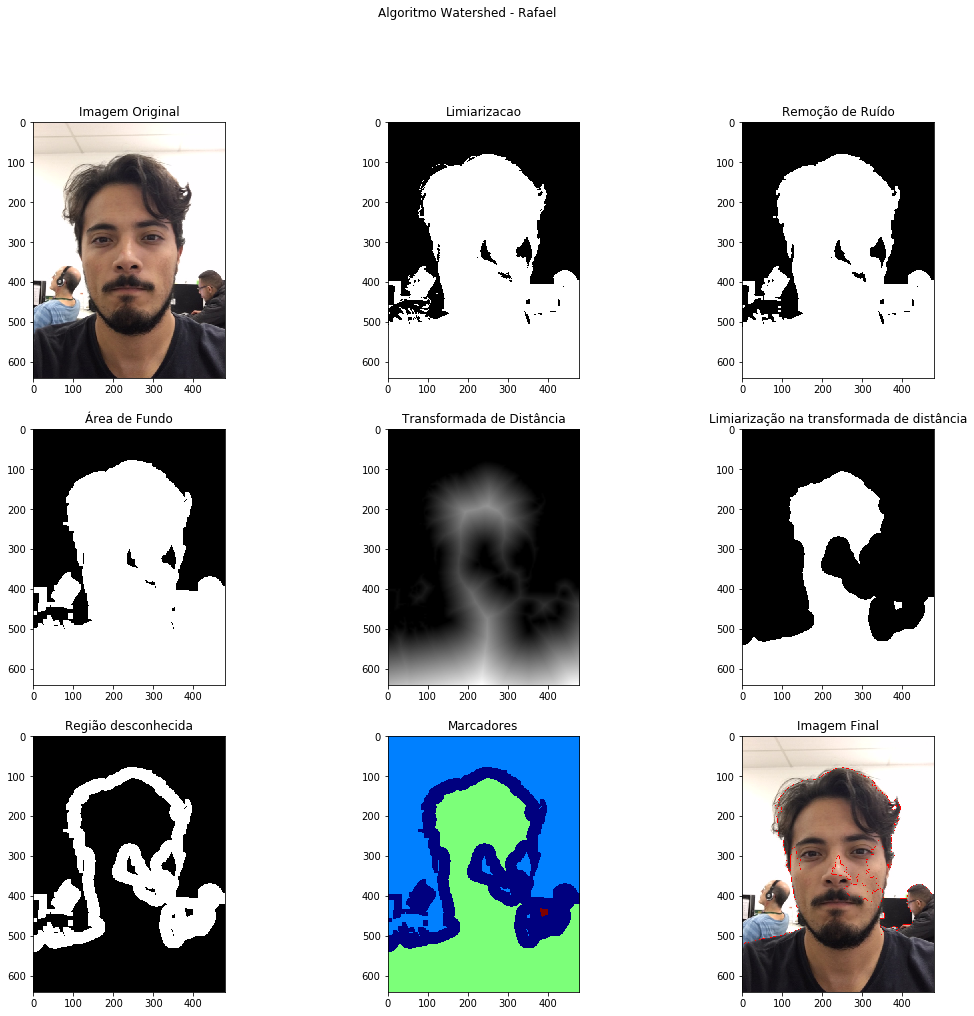

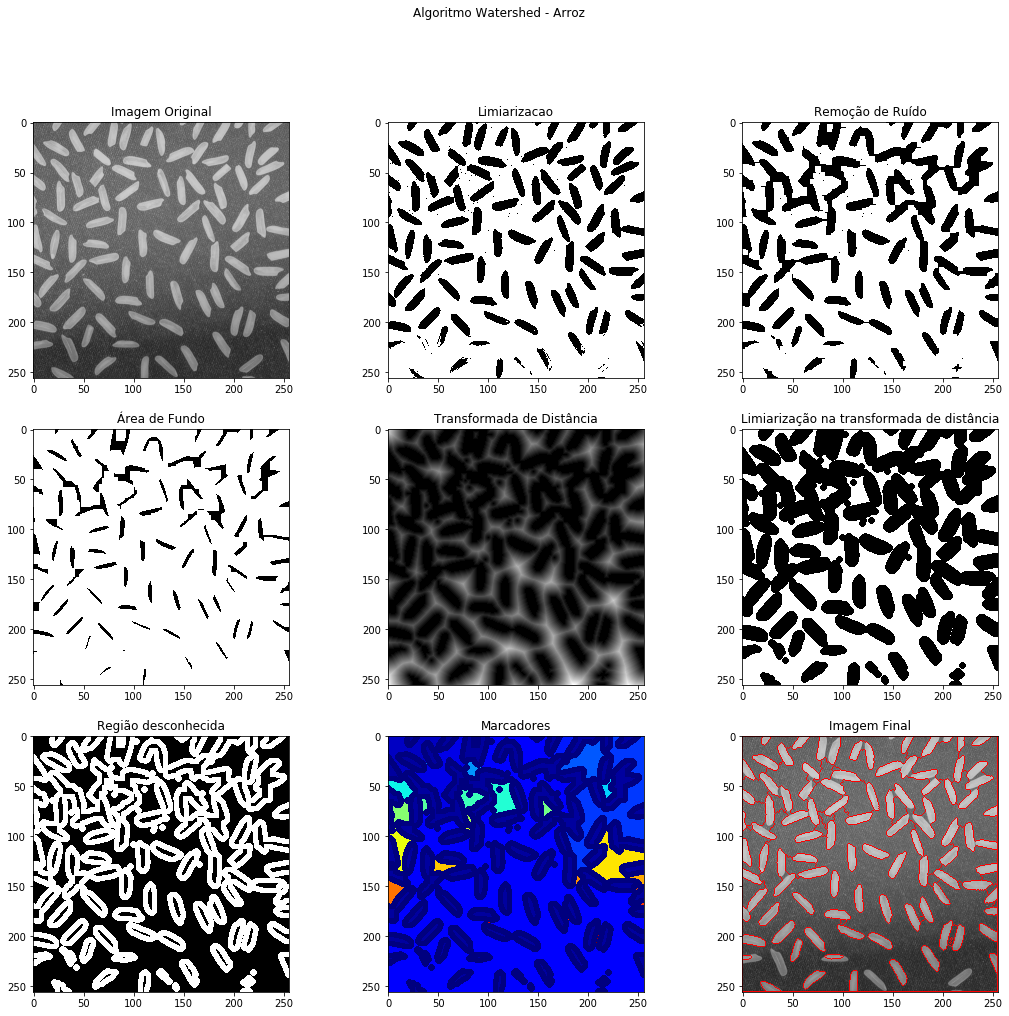

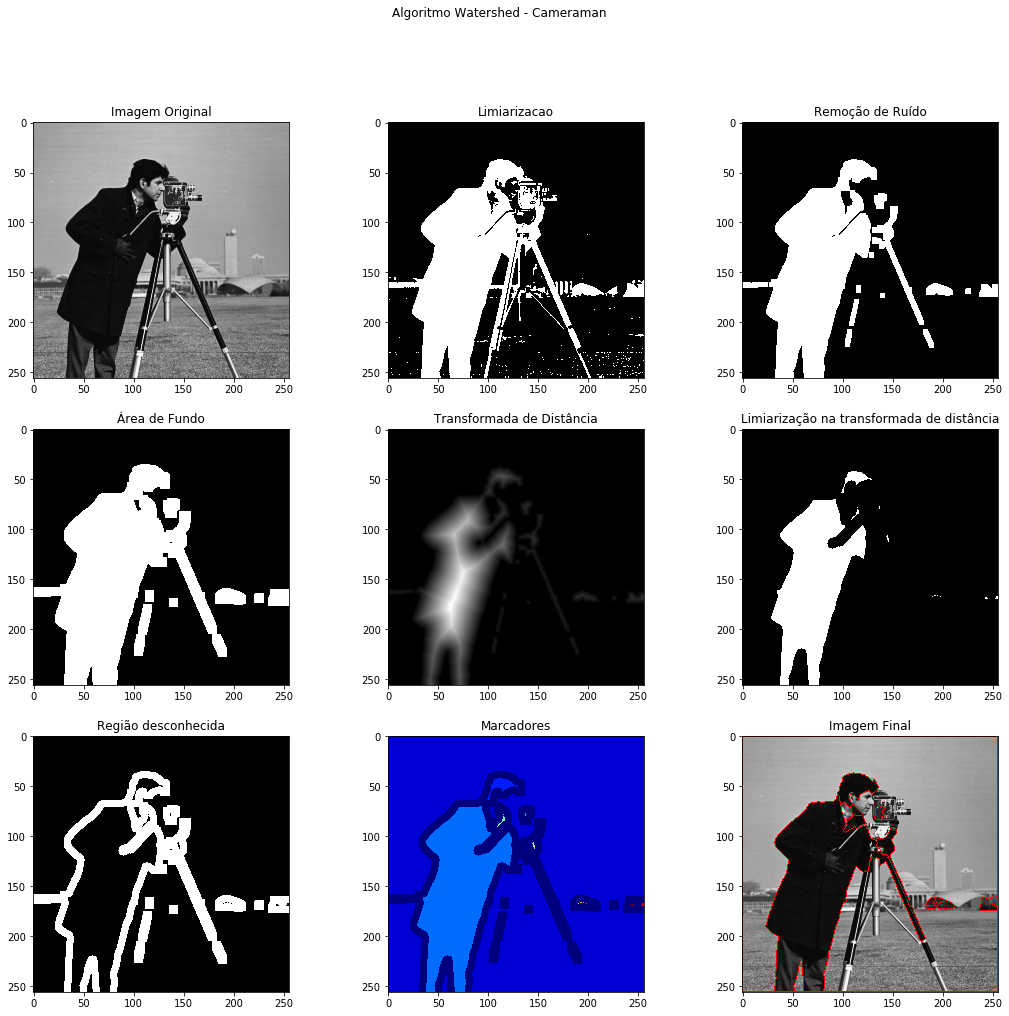

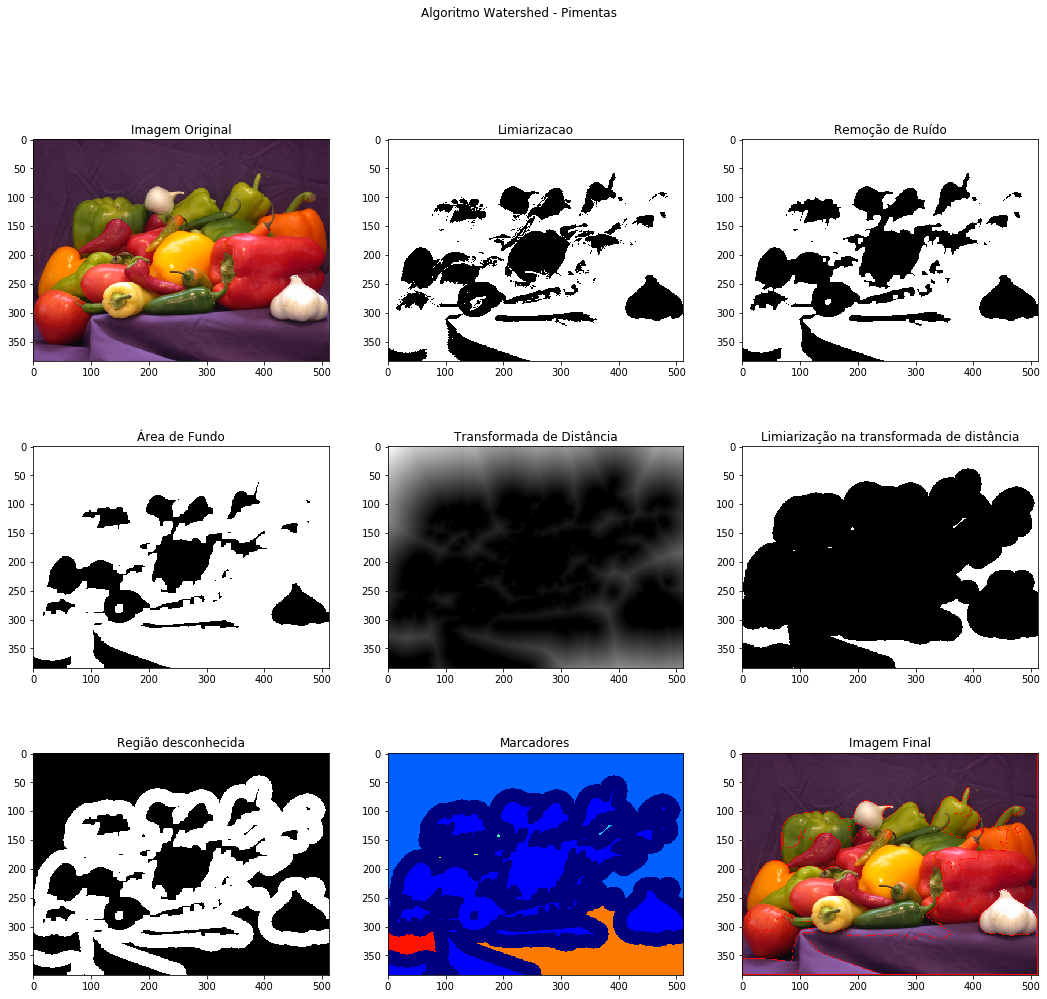

O tempo médio para o algoritmo foi de 0.11 segundos


In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
plt.close('all')


images = (cv.cvtColor(cv.imread('./arq_aux/rafael.jpeg'), cv.COLOR_BGR2RGB),
          cv.imread('./arq_aux/rice.png'),
          cv.imread('./arq_aux/cameraman.tif'),
          cv.cvtColor(cv.imread('./arq_aux/peppers.png'), cv.COLOR_BGR2RGB))

titles = ('Algoritmo Watershed - Rafael',
          'Algoritmo Watershed - Arroz',
          'Algoritmo Watershed - Cameraman',
          'Algoritmo Watershed - Pimentas')

t_f = []
for img, title in zip(images, titles):
    t_i = time.time()
    plt.figure(figsize=(18, 16))
    
    plt.suptitle(title)
    plt.subplot(331).imshow(img)
    plt.title('Imagem Original')
    
    cinza = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(cinza, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    
    plt.subplot(332).imshow(thresh, cmap='gray')
    plt.title('Limiarizacao')
    
    # Remoção de ruídos
    kernel = np.ones((3,3), np.uint8)
    abertura = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations = 2)
    
    plt.subplot(333).imshow(abertura, cmap='gray')
    plt.title('Remoção de Ruído')
    
    # Areas de Fundo
    fundo = cv.dilate(abertura, kernel, iterations=2)
    
    plt.subplot(334).imshow(fundo, cmap='gray')
    plt.title('Área de Fundo')
    
    # Áreas de frente
    dist_transform = cv.distanceTransform(abertura, cv.DIST_L2, 5)
    
    plt.subplot(335).imshow(dist_transform, cmap='gray')
    plt.title('Transformada de Distância')
    
    ret, frente = cv.threshold(dist_transform, 0.15*dist_transform.max(), 255, 0)
    
    plt.subplot(336).imshow(frente, cmap='gray')
    plt.title('Limiarização na transformada de distância')
    
    # Região desconhecida
    frente = np.uint8(frente)
    desconhecida = cv.subtract(fundo, frente)
    
    plt.subplot(337).imshow(desconhecida, cmap='gray')
    plt.title('Região desconhecida')
    
    # Marcadores
    ret, marcadores = cv.connectedComponents(frente)
    # Soma um em todos os marcadores (para que o fundo seja 1 e não zero)
    marcadores = marcadores+1
    # região desconhecida é zero
    marcadores[desconhecida==255] = 0
    
    plt.subplot(338).imshow(marcadores, cmap='jet')
    plt.title('Marcadores')
    
    marcadores = cv.watershed(img, marcadores)
    img[marcadores == -1] = [255,0,0]
    
    plt.subplot(339).imshow(img)
    plt.title('Imagem Final')
    t_f.append(time.time()-t_i)
    plt.show()

m_t = np.mean(t_f)
string = f'O tempo médio para o algoritmo foi de {m_t:.2f} segundos'
print(string)

# Conclusão



# Referências

**[1]** Torre, Vincent, e Tomaso A. Poggio. "On edge detection." IEEE Transactions on Pattern Analysis and Machine Intelligence 2 (1986): 147-163.

**[2]** Canny, John. "A computational approach to edge detection." IEEE Transactions on pattern analysis and machine intelligence 6 (1986): 679-698.

**[3]** Chhabra, Amit. "A hybrid approach for color based image edge detection." 2014 International Conference on Advances in Computing, Communications and Informatics (ICACCI). IEEE, 2014.

**[4]** Yuan, Liying, e Xue Xu. "Adaptive image edge detection algorithm based on canny operator." 2015 4th International Conference on Advanced Information Technology and Sensor Application (AITS). IEEE, 2015.

**[5]** Li, Jiaxi, et al. "A novel image edge detection method for workpiece based on improved Extreme learning machine and information measure." 2019 Chinese Automation Congress (CAC). IEEE, 2019.